In [1]:
# Overview of progress ( google API by country)  of vaccination (VS Death rate ) top 25 countries & Australia


In [2]:
#dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import plotly.express as px
from scipy import stats
import numpy as np


In [12]:
# read csv file with vaccination data  and convert to dataframe 
file="Resources/owid-covid-data.csv"
vacc=pd.read_csv(file)

#groupby country and get percentage of fully vacc & firstdose per hundred 
# as data gets updated as per time, hence the max will be the latest vaccination rate per hundred 
firstdose=vacc.groupby('location')['people_vaccinated_per_hundred'].max()
fully_vacc=vacc.groupby('location')['people_fully_vaccinated_per_hundred'].max()
country_code=vacc.groupby('location')['iso_code'].first()
total_cases_per_million=vacc.groupby('location')['total_cases_per_million'].max()
#create new dataframe with vacc progress (first, fully, not vacc )
vacc_details=pd.DataFrame({"First Dose": round(firstdose/100,2),
                           "Fully Vaccinated": round(fully_vacc/100,2),
                           "Not Vaccinated":"",
                           "Country code": country_code ,
                           "Death Rate":round(total_cases_per_million/10000,2)
                          
                          })

# clean data by dropping n/a and remove people vaccinated>100 per hundred (invalid data)
vacc_clean=vacc_details.loc[vacc_details['First Dose']<=1].dropna()

# calculate value of people not vaccinated and update df (100-people receive first dose)
vacc_clean['Not Vaccinated']=1-vacc_clean['First Dose']
vacc_progress=vacc_clean.sample(n=24)
pd.options.display.float_format = '{:.2%}'.format

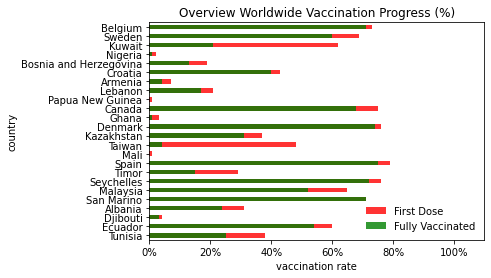

In [13]:
# plotting stack bar chart 
ax=vacc_progress['First Dose'].plot(kind='barh', color='red', width=.5, alpha=0.8)
vacc_progress['Fully Vaccinated'].plot(kind='barh', color='green', width=.5, alpha=0.8)
#setting range of x axis and format it as % 
ax.set_xlim(0, 1.1)
ax.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
#adding labels 
#legend.loc="lower right"
ax.set_xlabel('vaccination rate')
ax.set_ylabel('country')
ax.set_title('Overview Worldwide Vaccination Progress (%)')
ax.legend(loc='best', frameon=False)

In [14]:
vacc_clean.reset_index(level=0, inplace=True)
fig = px.choropleth(vacc_clean, locations=vacc_clean['Country code'],
                    color=vacc_clean['First Dose'],
                    hover_name=vacc_clean['location'],
                    color_continuous_scale="Viridis",
                    range_color=(0, 1),
                    labels={'First Dose':'First Dose rate'},
                    
                   )
fig.update_layout(
    title_text='Global Vaccincation Progress Overview', 
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
     text='Source: <a href="https://ourworldindata.org/covid-vaccinations">Our World in Data</a>',
        showarrow = False
    )]
)
fig.show()

In [15]:
vacc_progress.reset_index(level=0, inplace=True)
vacc_progress.head()

,location,First Dose,Fully Vaccinated,Not Vaccinated,Country code,Death Rate
0,Tunisia,38.00%,25.00%,62.00%,TUN,574.00%
1,Ecuador,60.00%,54.00%,40.00%,ECU,282.00%
2,Djibouti,4.00%,3.00%,96.00%,DJI,118.00%
3,Albania,31.00%,24.00%,69.00%,ALB,547.00%
4,San Marino,71.00%,71.00%,29.00%,SMR,1580.00%


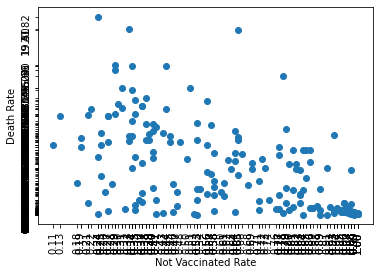

In [16]:
# Generate a scatter plot of Not Vaccinated  versus Death Rate (per 1000)
vacc_status = vacc_clean.iloc[:,3]
death_rate = vacc_clean.iloc[:,5]
country=vacc_clean.iloc[:,0]
plt.scatter(vacc_status,death_rate)
plt.xticks(vacc_status, rotation=90)
plt.yticks(death_rate, rotation=90)
plt.xlabel('Not Vaccinated Rate')
plt.ylabel('Death Rate')
plt.show()